# **Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')

# **Exploring Data**

In [3]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
data.shape

(1000, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


# **Checking for NULL Variables**

In [7]:
data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

# **Counting Number of Certificates**

In [8]:
data['Certificate'].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

<Axes: title={'center': 'Certificates Counter'}, xlabel='Certificate', ylabel='Certificate Count'>

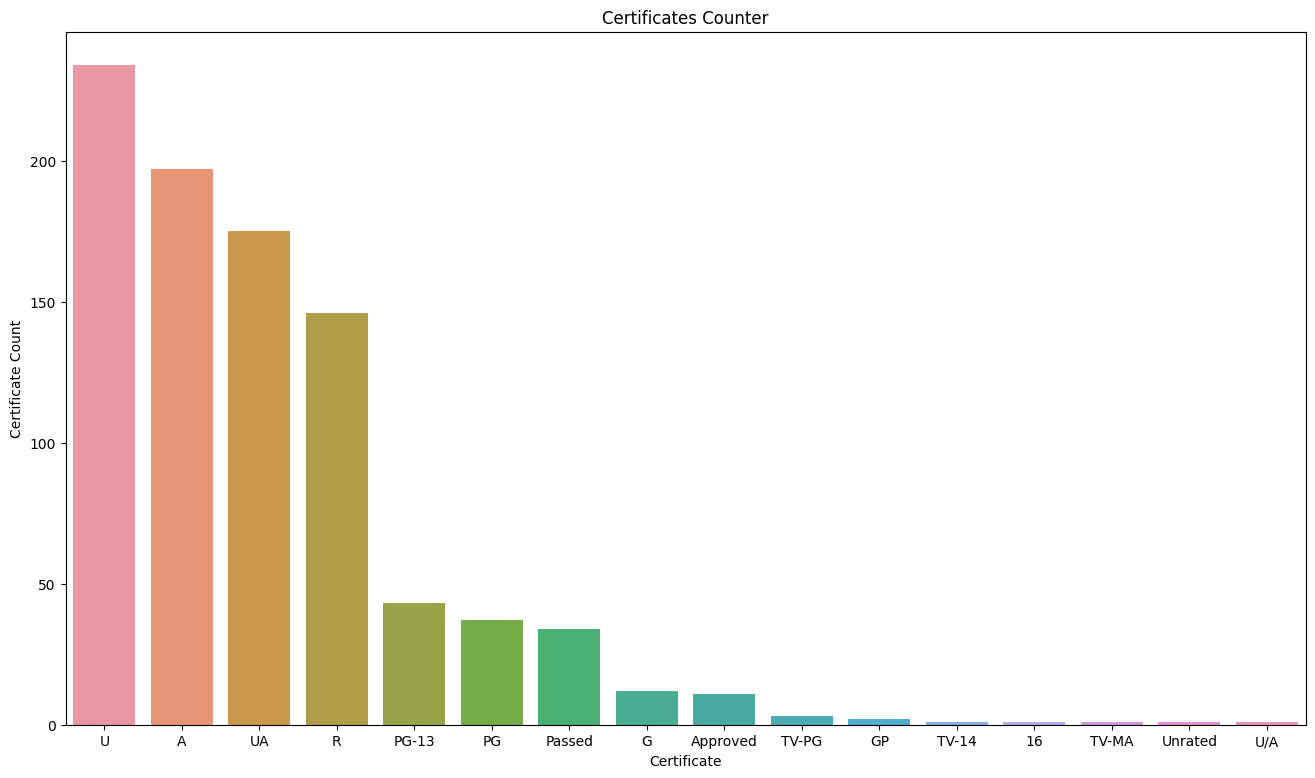

In [9]:
plt.figure(figsize = (16,9))
cert_names = data['Certificate'].value_counts().index
cert_vals = data['Certificate'].value_counts().values
plt.xlabel('Certificate')
plt.ylabel('Certificate Count')
plt.title('Certificates Counter')
sns.barplot(x = cert_names, y = cert_vals)

# **Counting Ratings**

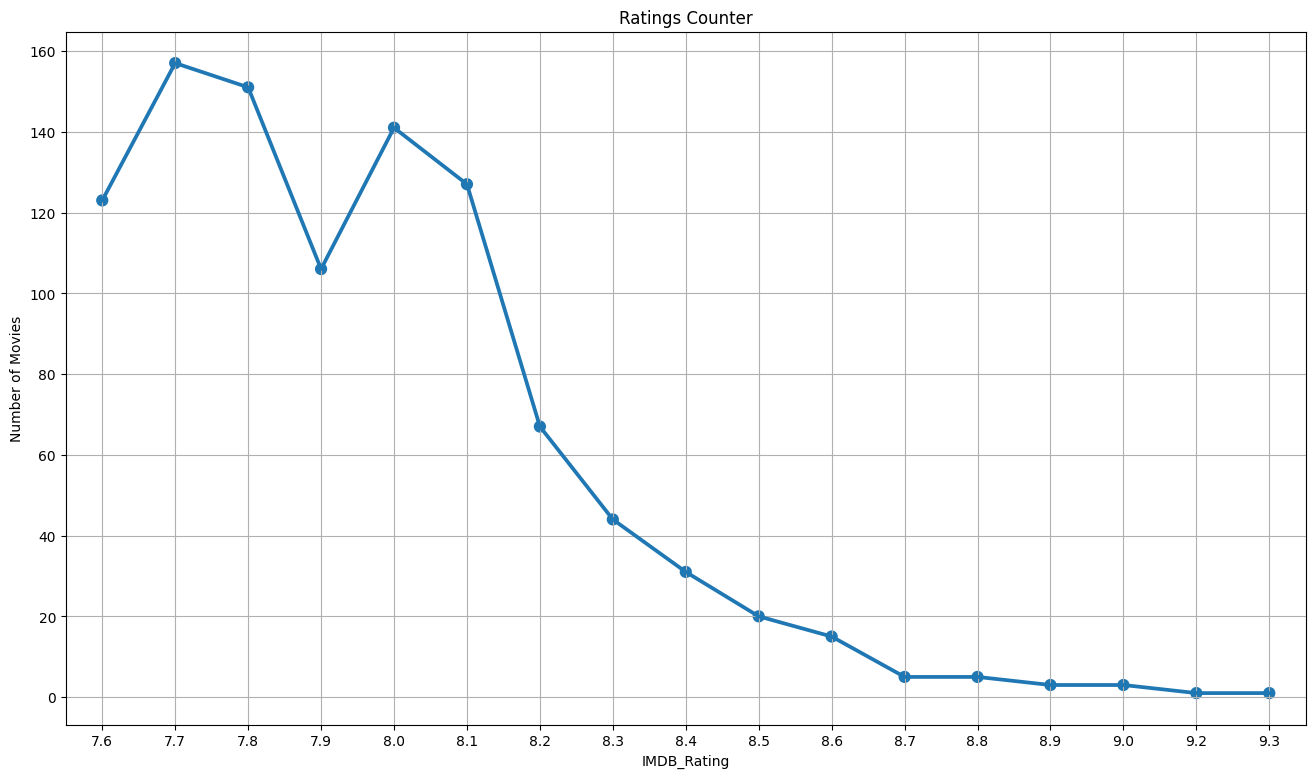

In [10]:
plt.figure(figsize = (16,9))
rating = data['IMDB_Rating'].value_counts().index
rating_count = data['IMDB_Rating'].value_counts().values
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')
plt.title('Ratings Counter')
sns.pointplot(x = rating, y = rating_count)
plt.grid()

# **Number of movies produced per year**

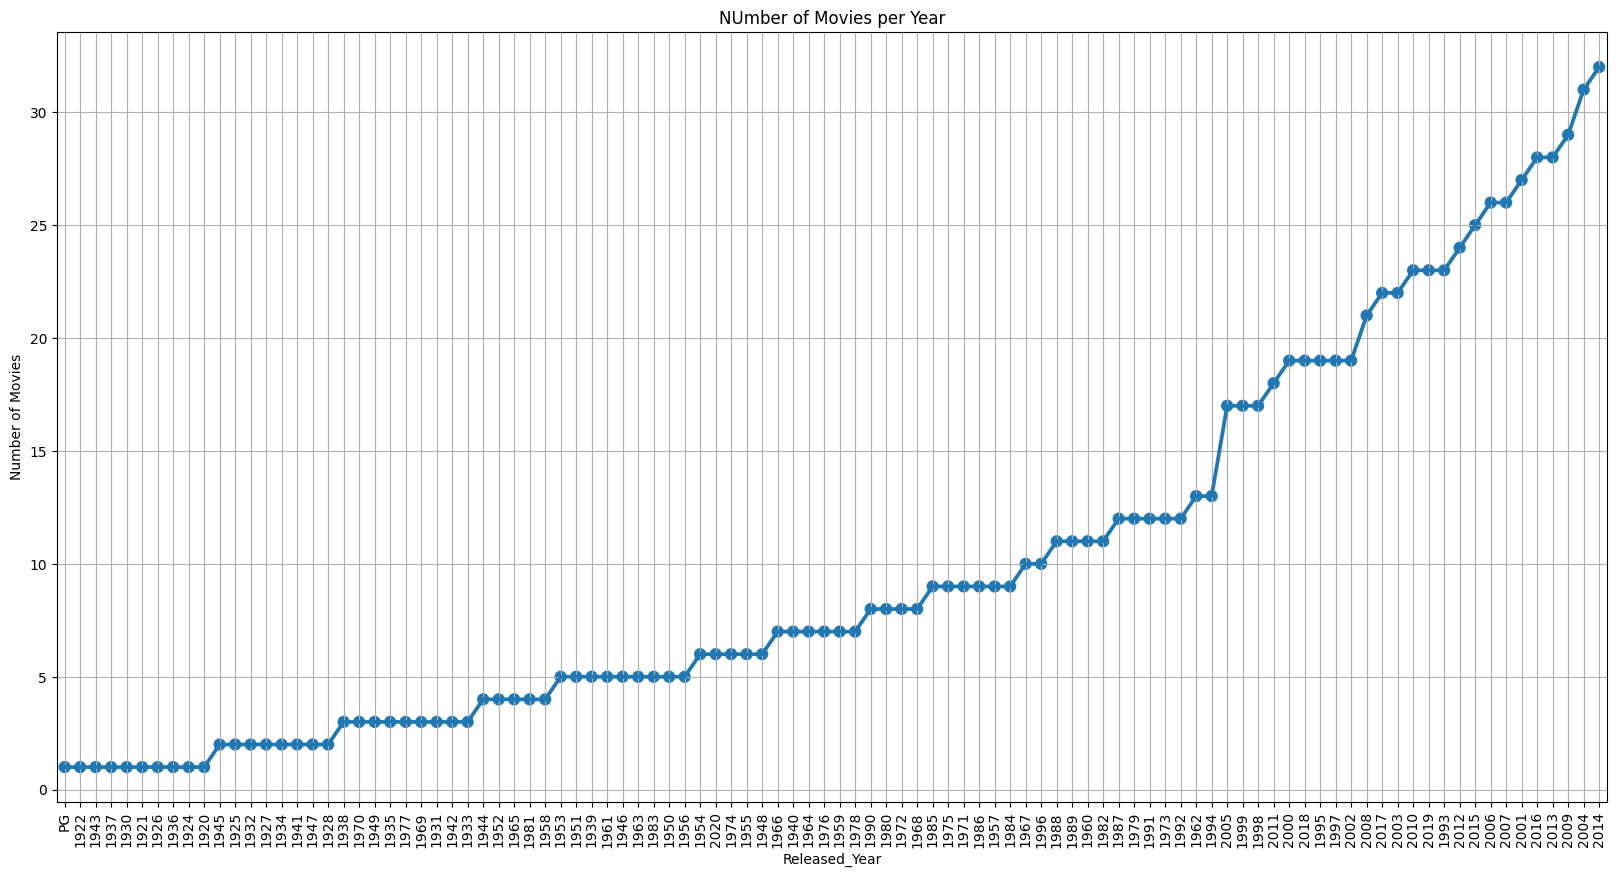

In [11]:
plt.figure(figsize = (20,10))
year = data['Released_Year'].value_counts().sort_values().index
year_count = data['Released_Year'].value_counts().sort_values().values
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('NUmber of Movies per Year')
sns.pointplot(x = year, y = year_count)
plt.xticks(rotation = 90)
plt.grid()

# **Finding Correlations**

Adjusting data type

In [12]:
data['Gross'].dtype

dtype('O')

In [13]:
# HANDLING NULL VARIABLES
data['Gross'] = data['Gross'].str.replace(',','')
data['Gross'] = data['Gross'].replace(np.nan, 0)
data['Gross'].head()

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: object

In [14]:
data['Gross'] = data['Gross'].astype(int)

In [15]:
data['Gross'].head()

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: int64

In [16]:
data[['IMDB_Rating','Meta_score','No_of_Votes','Gross']].corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.268531,0.494979,0.082381
Meta_score,0.268531,1.000000,-0.018507,-0.053659
No_of_Votes,0.494979,-0.018507,1.000000,0.602128
Gross,0.082381,-0.053659,0.602128,1.000000


<Axes: >

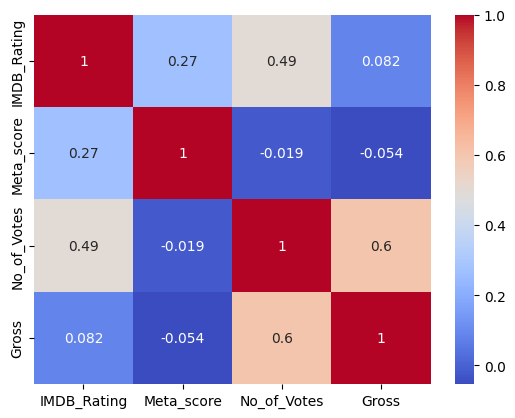

In [17]:
correlations = data[['IMDB_Rating','Meta_score','No_of_Votes','Gross']].corr()
sns.heatmap(data = correlations, cmap = 'coolwarm', annot = True)

# **Top voted movies**

In [18]:
# TOP VOTED MOVIES
top_voted = data.sort_values(['No_of_Votes'], ascending = False)
top_voted.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762


Text(0.5, 1.0, 'Top Voted Movies')

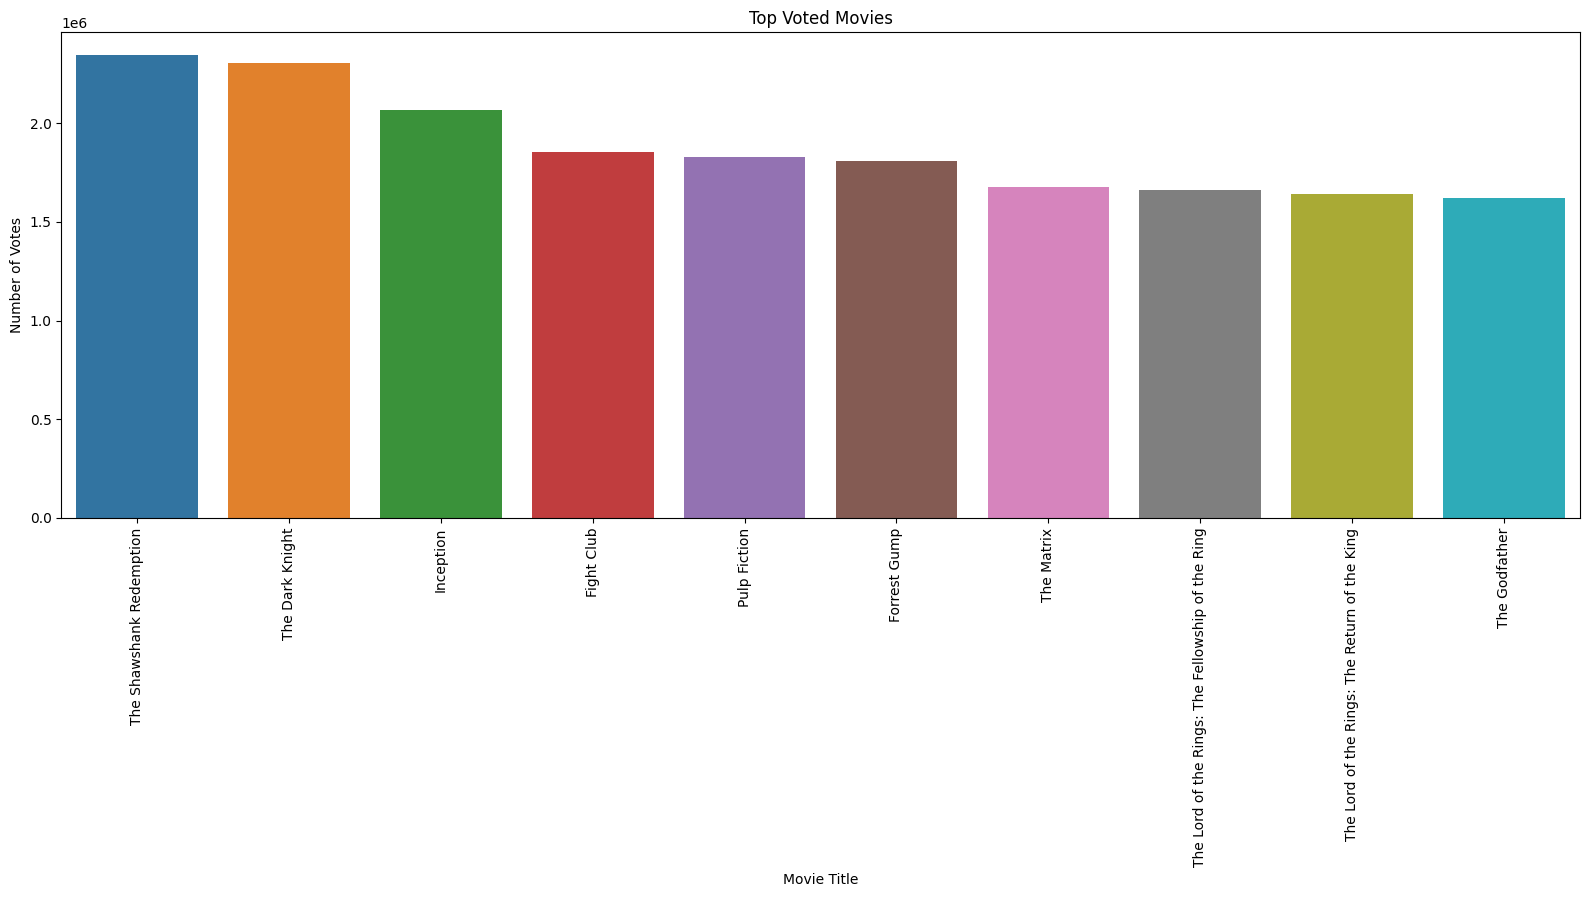

In [19]:
plt.figure(figsize=(16,9))
sns.barplot(x = top_voted['Series_Title'][:10], y = top_voted['No_of_Votes'][:10])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')
plt.title('Top Voted Movies')

# **Ratings of Top Voted Movies**

Text(0.5, 1.0, 'Top Voted Movies - IMDB Rating')

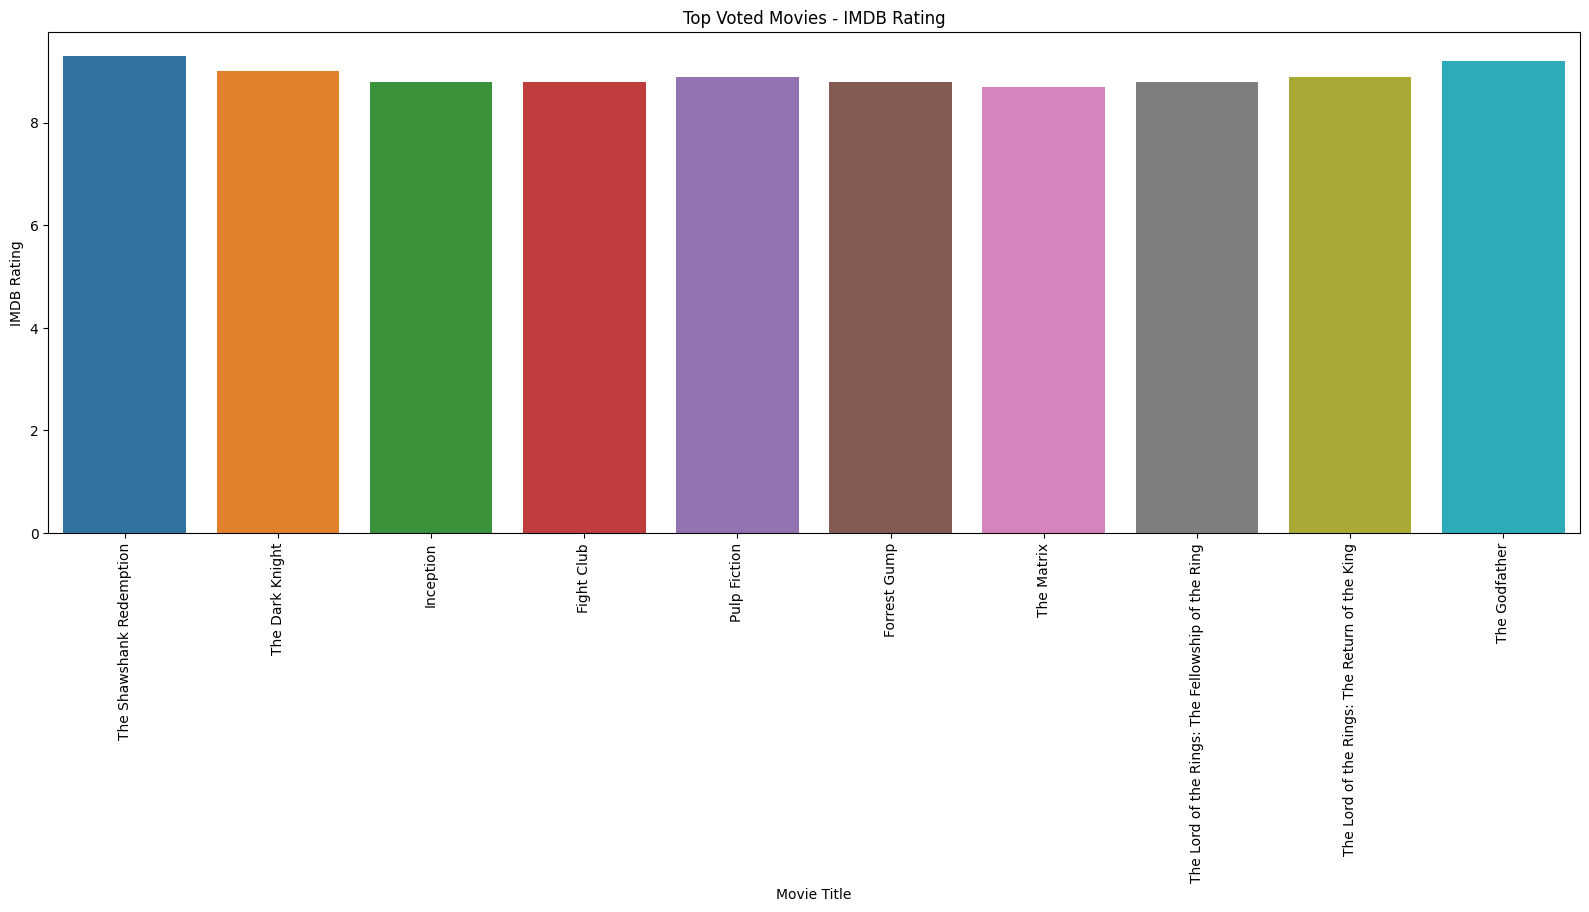

In [20]:
# TOP VOTED RATINGS
plt.figure(figsize=(16,9))
sns.barplot(x = top_voted['Series_Title'][:10], y = top_voted['IMDB_Rating'][:10])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlabel('Movie Title')
plt.ylabel('IMDB Rating')
plt.title('Top Voted Movies - IMDB Rating')

# **Revenue of Top Rated Movies**

Text(0.5, 1.0, 'Top Voted Movies - Gross Value')

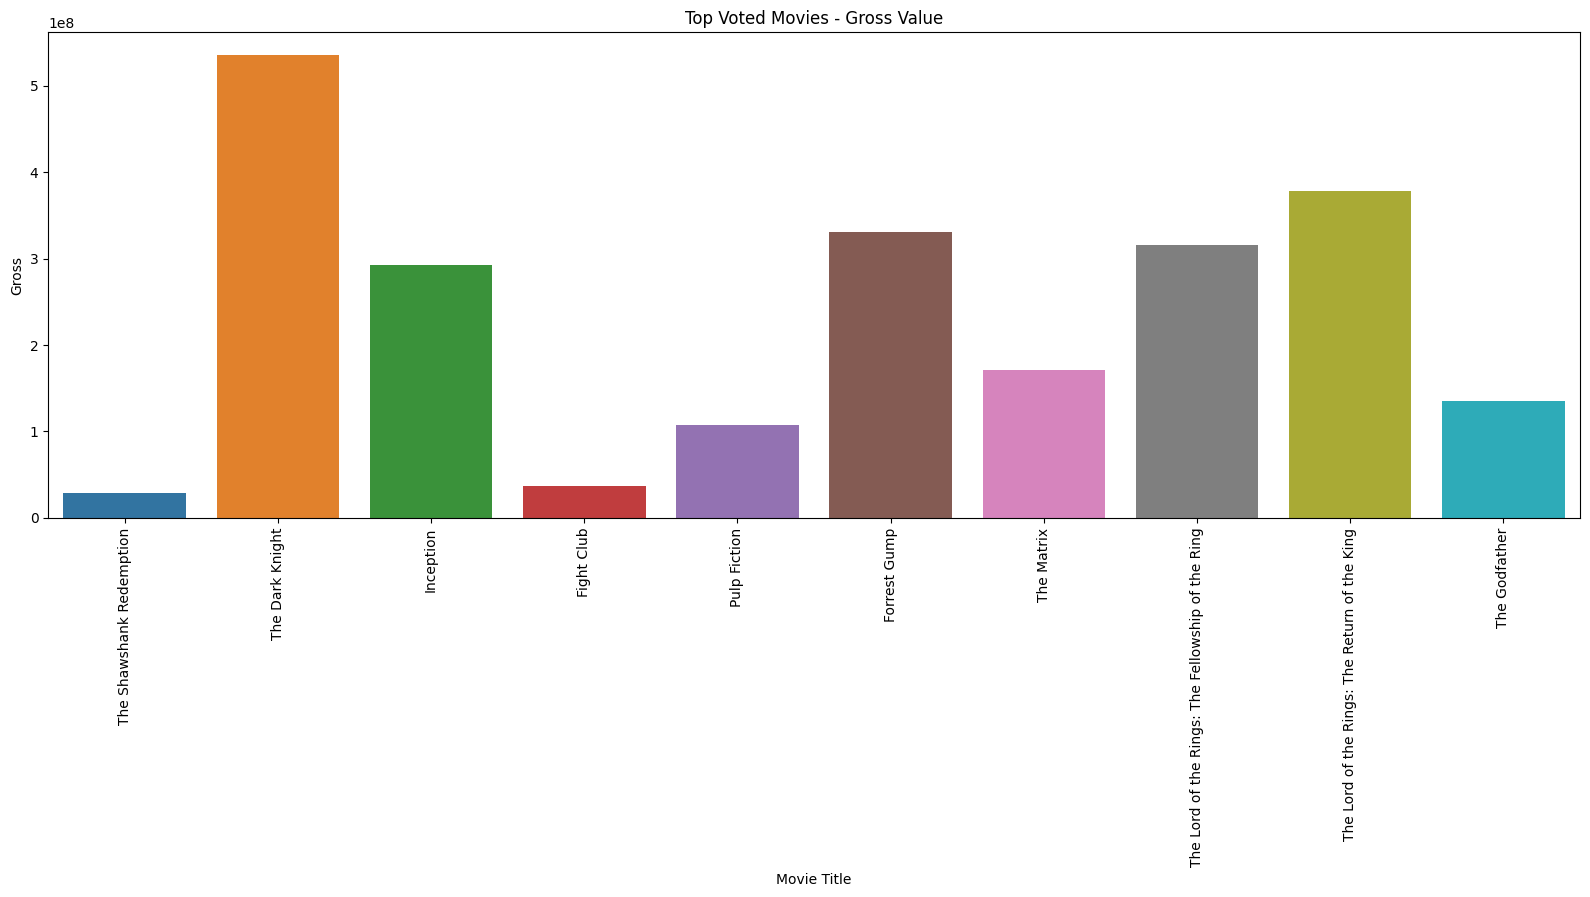

In [21]:
# GROSS OF TOP RATED MOVIES
plt.figure(figsize=(16,9))
sns.barplot(x = top_voted['Series_Title'][:10], y = top_voted['Gross'][:10])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlabel('Movie Title')
plt.ylabel('Gross')
plt.title('Top Voted Movies - Gross Value')

# **Movies with the Highest Revenue**

Text(0.5, 1.0, 'Movies with Highest Gross')

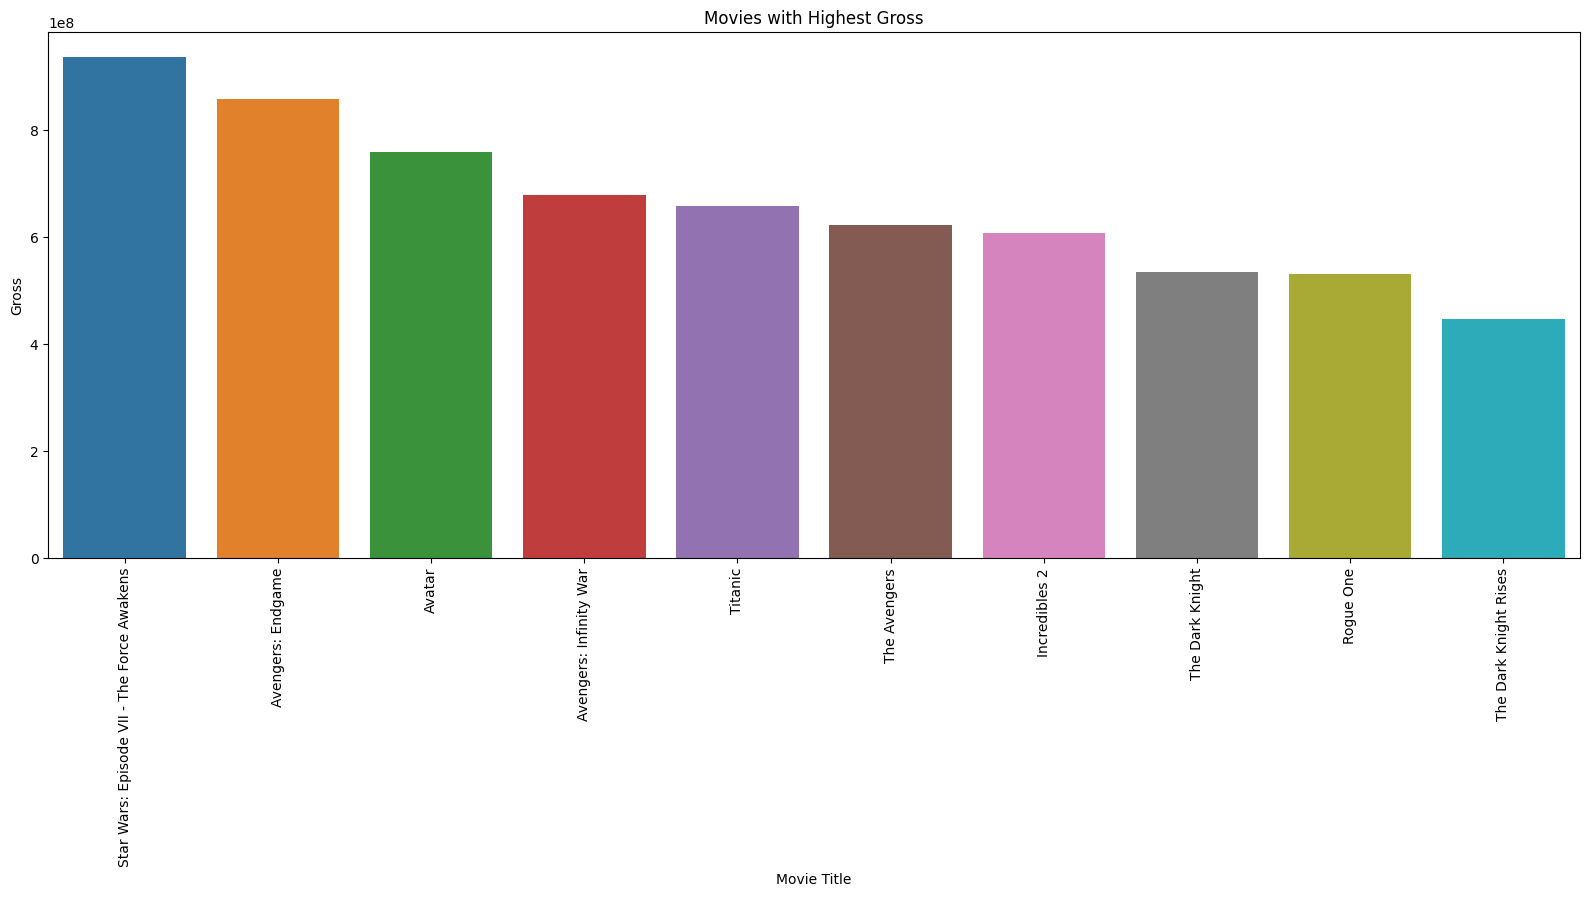

In [22]:
# MOVIES WITH HIGHEST GROSS
highest_gross_movies = data.sort_values(['Gross'], ascending = False)
plt.figure(figsize=(16,9))
sns.barplot(x = highest_gross_movies['Series_Title'][:10], y = highest_gross_movies['Gross'][:10])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlabel('Movie Title')
plt.ylabel('Gross')
plt.title('Movies with Highest Gross')

# **Top Directors by Revenue**

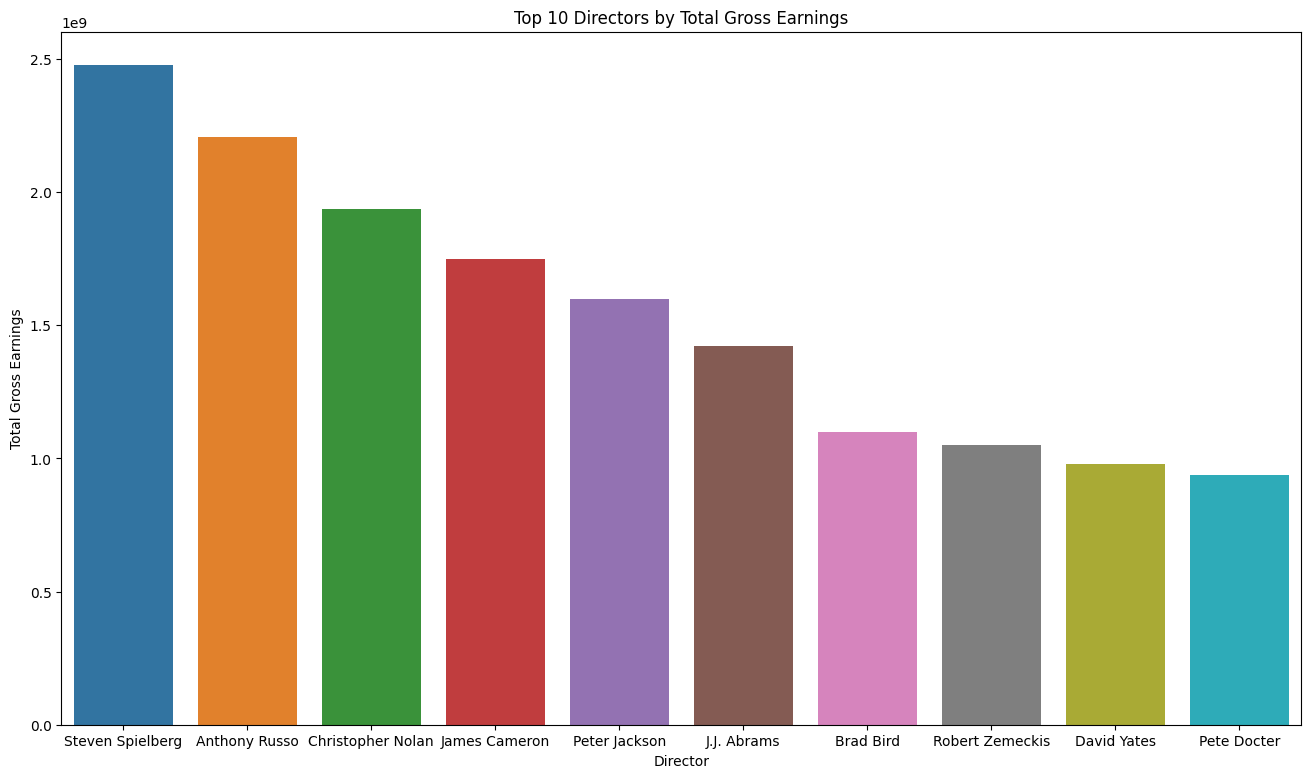

In [23]:
# Total Gross Earnings per Director
total_gross_per_director = data.groupby('Director')['Gross'].sum()

# Sort directors based on total gross earnings in descending order
sorted_directors_by_gross = total_gross_per_director.sort_values(ascending=False)

# Select the top 10 directors
top_10_directors_by_gross = sorted_directors_by_gross.head(10)

# Plotting
plt.figure(figsize=(16, 9))
sns.barplot(x = top_10_directors_by_gross.index, y = top_10_directors_by_gross.values)
#top_10_directors_by_gross.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors by Total Gross Earnings')
plt.xlabel('Director')
plt.ylabel('Total Gross Earnings')
plt.show()


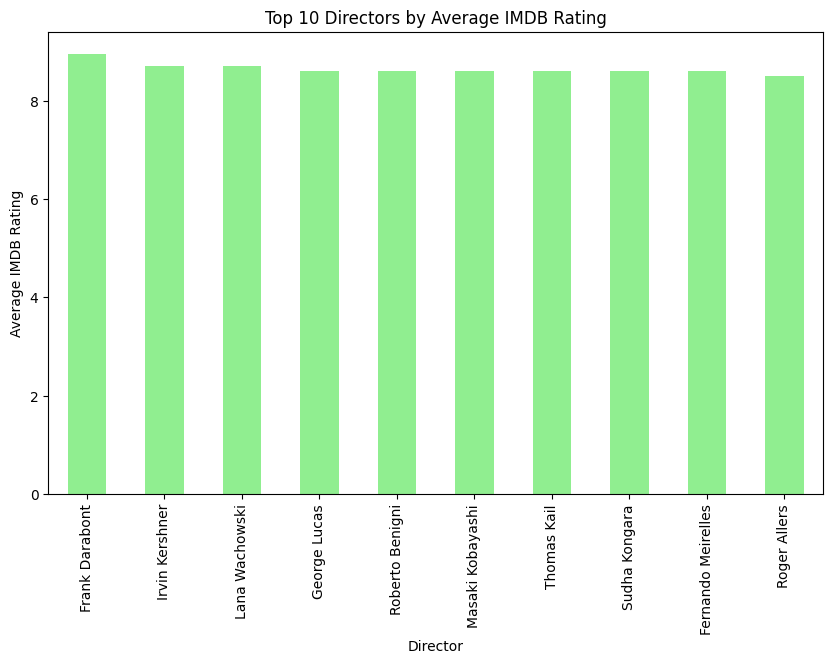

In [24]:
# AVERAGE IMDB RATING PER DIRECTOR
average_rating_per_director = data.groupby('Director')['IMDB_Rating'].mean()

# Sort directors based on average IMDb rating in descending order
sorted_directors_by_rating = average_rating_per_director.sort_values(ascending=False)

# Select the top 10 directors
top_10_directors_by_rating = sorted_directors_by_rating.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_directors_by_rating.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Directors by Average IMDB Rating')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.show()


# **Top Genres by Gross**

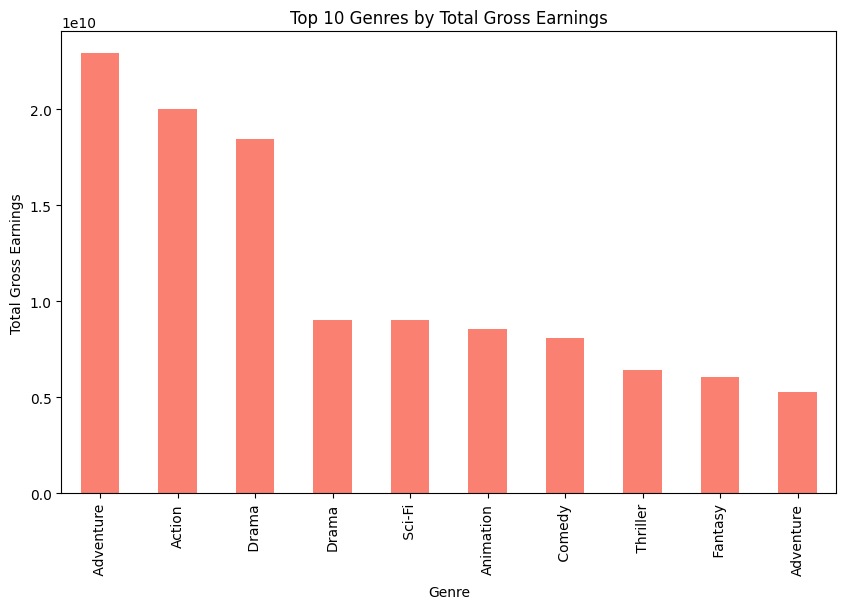

In [25]:
data['Genres'] = data['Genre'].str.split(',')

df_genre = data.explode('Genres')
total_gross_per_genre = df_genre.groupby('Genres')['Gross'].sum()

# Sort genres based on total gross earnings in descending order
sorted_genres_by_gross = total_gross_per_genre.sort_values(ascending=False)

# Select the top 10 genres
top_10_genres_by_gross = sorted_genres_by_gross.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_genres_by_gross.plot(kind='bar', color='salmon')
plt.title('Top 10 Genres by Total Gross Earnings')
plt.xlabel('Genre')
plt.ylabel('Total Gross Earnings')
plt.show()